In [2]:
import numpy as np
import os
import sys
import inspect
import matplotlib.pyplot as plt


#Define WPIT package location
current_dir =  os.path.abspath(os.path.dirname('__file__'))
fpath = os.path.abspath(current_dir + "/..")
sys.path.append(fpath)


import WPIT.Environment_mod as env
import WPIT.WaveProperties_mod as wave
import WPIT.WPI_mod.whistler_electron_mod as wpi

In [59]:
ne_0=10**7 #equatorial electron density in m^-3
L_shell=5  #L-shell of the simulation 
By_wave=306.2*10**(-12)   # By component of the wave in Tesla
aeq0_deg=68   #initial equatorial pitch angle in deg
aeq0=np.deg2rad(aeq0_deg) #convert pitch angle to rad
Ekev0=168.3 #initial energy in keV
lamda0_deg=-9  # starting electron latitude in deg
lamda0=np.deg2rad(lamda0_deg) #convert latitude to rad
theta0_deg=0.0001# initial wave normal angle in deg
theta0=np.deg2rad(theta0_deg) #convert wave normal angle to rad
f_wave=2000 # wave frequency in Hz
w_wave=2*np.pi*f_wave #wave angular frequency in rad/s
m_res=1 #WPI resonance number (0=Landau resonance)
eta0_deg=np.linspace(0,360,120) #initial electron-wave phases in deg
eta0=np.deg2rad(eta0_deg) #convert initial electron-wave phases to rad

t=0.1 #simulation duration (s)
h=0.00001  #simulation stepsize
Nsteps=int(t/h) #number of simulation steps
print(eta0)

[0.         0.05279988 0.10559975 0.15839963 0.21119951 0.26399938
 0.31679926 0.36959914 0.42239901 0.47519889 0.52799877 0.58079864
 0.63359852 0.68639839 0.73919827 0.79199815 0.84479802 0.8975979
 0.95039778 1.00319765 1.05599753 1.10879741 1.16159728 1.21439716
 1.26719704 1.31999691 1.37279679 1.42559667 1.47839654 1.53119642
 1.5839963  1.63679617 1.68959605 1.74239593 1.7951958  1.84799568
 1.90079556 1.95359543 2.00639531 2.05919518 2.11199506 2.16479494
 2.21759481 2.27039469 2.32319457 2.37599444 2.42879432 2.4815942
 2.53439407 2.58719395 2.63999383 2.6927937  2.74559358 2.79839346
 2.85119333 2.90399321 2.95679309 3.00959296 3.06239284 3.11519272
 3.16799259 3.22079247 3.27359234 3.32639222 3.3791921  3.43199197
 3.48479185 3.53759173 3.5903916  3.64319148 3.69599136 3.74879123
 3.80159111 3.85439099 3.90719086 3.95999074 4.01279062 4.06559049
 4.11839037 4.17119025 4.22399012 4.27679    4.32958988 4.38238975
 4.43518963 4.48798951 4.54078938 4.59358926 4.64638913 4.699189

In [27]:
lats_deg = np.arange(-45,45,0.1)
lats_rad = np.deg2rad(lats_deg)
Larg=5

Bmag=[]
ne=[]
nH=[]
nHe=[]
nO=[]
wce=[]
wcH=[]
wcHe=[]
wcO=[]

wpe=[]
wpH=[]
wpHe=[]
wpO=[]
wuhr=[]
wlhr=[]
dwceds=[]
for i in range(0,len(lats_rad)):
    Bmag0=env.Bmag_dipole(Larg,lats_rad[i])
    Bmag.append(Bmag0)
    ne0=env.density_FL_denton(ne_0,lats_rad[i])
    ne.append(ne0)
    #assuming 94%H+, 5.4%He+, 0.6%O+
    nH.append(0.77*ne0)
    nHe.append(0.2*ne0)
    nO.append(0.03*ne0)
    
    nH0=0.77*ne0
    nHe0=0.2*ne0
    nO0=0.03*ne0
    wce0=env.omega_cyclotron(Bmag0,env.const.qe,env.const.me)
    
    wcH0=env.omega_cyclotron(Bmag0,env.const.qe,env.const.mH)
    wcHe0=env.omega_cyclotron(Bmag0,env.const.qe,env.const.mHe)
    wcO0=env.omega_cyclotron(Bmag0,env.const.qe,env.const.mO)

    wpe0=env.omega_plasma(ne0,env.const.qe,env.const.me)
    wpH0=env.omega_plasma(nH0,env.const.qi,env.const.mH)
    wpHe0=env.omega_plasma(nHe0,env.const.qi,env.const.mHe)
    wpO0=env.omega_plasma(nO0,env.const.qi,env.const.mO)
    wuhr0=env.omega_uhr(wce0,wpe0)
    wlhr0=env.omega_lhr(wce0, wpe0, wcH0, wpH0)
    dwceds0=env.dwc_ds(wce0,lamda0,L_shell)
    
    wce.append(wce0)
    wcH.append(wcH0)
    wcHe.append(wcHe0)
    wcO.append(wcO0)
    dwceds.append(dwceds0)
    wpe.append(wpe0)
    wpH.append(wpH0)
    wpHe.append(wpHe0)
    wpO.append(wpO0)
    wuhr.append(wuhr0)
    wlhr.append(wlhr0)

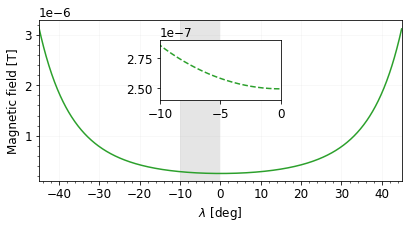

In [28]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})
inch_to_mm=0.0393700787
import matplotlib.ticker as tck
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
fig, ax = plt.subplots(figsize=(6,85*inch_to_mm))
s=5

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.plot(np.rad2deg(lats_rad),Bmag,color='tab:green')
# ax.set_yscale('log')
ax.grid(alpha=.1)
ax.set_xlim(-45,45)
ax.set_xlabel(r'$\lambda$ [deg]')
ax.set_ylabel('Magnetic field [T]') 
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
# ax.legend(frameon=False)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())

scale=10
# axins = zoomed_inset_axes(ax, 1, loc=1)
axins = ax.inset_axes([-15, 1.7*10**(-6), 30, 1.2*10**(-6)],transform=ax.transData)
axins.plot(np.rad2deg(lats_rad),Bmag,color='tab:green',linestyle='dashed')

axins.set_xlim(-10, 0)
axins.set_ylim(2.4*10**(-7), 2.9*10**(-7))
# plt.xticks(visible=False)
# plt.yticks(visible=False)
# mark_inset(ax, axins, loc1=3, loc2=4, fc="gray",alpha=.4, ec="0.1")
plt.axvspan(-10, 0, facecolor='gray', alpha=0.2)
# ax.legend(frameon=False)
plt.tight_layout()
plt.savefig('env_magnetic.jpg',dpi=300)
plt.show()

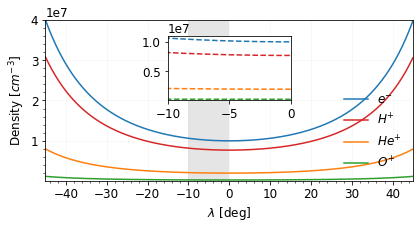

In [29]:
fig, ax = plt.subplots(figsize=(6,85*inch_to_mm))
s=5

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.plot(np.rad2deg(lats_rad),ne,color='tab:blue',label='$e^{-}$')
ax.plot(np.rad2deg(lats_rad),nH,color='tab:red',label='$H^{+}$')
ax.plot(np.rad2deg(lats_rad),nHe,color='tab:orange',label='$He^{+}$')
ax.plot(np.rad2deg(lats_rad),nO,color='tab:green',label='$O^{+}$')

# ax.set_yscale('log')
ax.grid(alpha=.1)
ax.set_xlim(-45,45)
ax.set_ylim(0.01*10**(7), 4*10**(7))
ax.set_xlabel(r'$\lambda$ [deg]')
ax.set_ylabel('Density $[cm^{-3}]$') 
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
# ax.legend(frameon=False)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax.legend(frameon=False,loc=4)
scale=10
# axins = zoomed_inset_axes(ax, 1, loc=1)
axins = ax.inset_axes([-15, 2*10**7, 30, 1.6*10**7],transform=ax.transData)

axins.plot(np.rad2deg(lats_rad),ne,color='tab:blue',linestyle='dashed')
axins.plot(np.rad2deg(lats_rad),nH,color='tab:red',linestyle='dashed')
axins.plot(np.rad2deg(lats_rad),nHe,color='tab:orange',linestyle='dashed')
axins.plot(np.rad2deg(lats_rad),nO,color='tab:green',linestyle='dashed')

axins.set_xlim(-10, 0)
axins.set_ylim(0.01*10**(7), 1.1*10**(7))
# plt.xticks(visible=False)
# plt.yticks(visible=False)
plt.axvspan(-10, 0, facecolor='gray', alpha=0.2)

# ax.legend(frameon=False)
plt.tight_layout()
plt.savefig('env_densities.jpg',dpi=300)
plt.show()

/home/tourgaidis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  app.launch_new_instance()
/home/tourgaidis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/home/tourgaidis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:42: UserWarning: AutoMinorLocator does not work with logarithmic scale
/home/tourgaidis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:43: UserWarning: AutoMinorLocator does not work with logarithmic scale
/home/tourgaidis/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


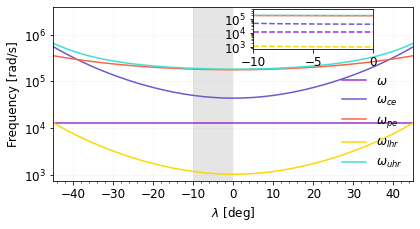

In [30]:
w_wave_array= np.full((np.shape(lats_rad)), w_wave)

fig, ax = plt.subplots(figsize=(6,85*inch_to_mm))
s=5

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.plot(np.rad2deg(lats_rad),w_wave_array,color='darkorchid',label='$\omega$')
ax.plot(np.rad2deg(lats_rad),wce,color='slateblue',label='$\omega_{ce}$')
ax.plot(np.rad2deg(lats_rad),wpe,color='tomato',label='$\omega_{pe}$')
ax.plot(np.rad2deg(lats_rad),wlhr,color='gold',label='$\omega_{lhr}$')
ax.plot(np.rad2deg(lats_rad),wuhr,color='turquoise',label='$\omega_{uhr}$')

ax.set_yscale('log')
ax.grid(alpha=.1)
ax.set_xlim(-45,45)
ax.set_ylim(0, 4*10**(6))
ax.set_xlabel(r'$\lambda$ [deg]')
ax.set_ylabel('Frequency [rad/s]') 
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
ax.legend(frameon=False,loc=4)
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
# ax.legend(frameon=False,loc=4)
scale=10
# axins = zoomed_inset_axes(ax, 1, loc=1)
axins = ax.inset_axes([5, 5*10**5, 30, 30*10**5],transform=ax.transData)

axins.set_yscale('log')
axins.plot(np.rad2deg(lats_rad),w_wave_array,color='darkorchid',linestyle='dashed')
axins.plot(np.rad2deg(lats_rad),wce,color='slateblue',linestyle='dashed')
axins.plot(np.rad2deg(lats_rad),wpe,color='tomato')
axins.plot(np.rad2deg(lats_rad),wlhr,color='gold',linestyle='dashed')
axins.plot(np.rad2deg(lats_rad),wuhr,color='turquoise',linestyle='dashed')
plt.axvspan(-10, 0, facecolor='gray', alpha=0.2)
axins.set_xlim(-10, 0)
axins.set_ylim(0, 5*10**(5))
# plt.xticks(visible=False)
# plt.yticks(visible=False)
# plt.axvspan(-10, 0, facecolor='gray', alpha=0.2)
# ax.legend(frameon=False)
plt.tight_layout()
plt.savefig('env_freqs.jpg',dpi=300)
plt.show()

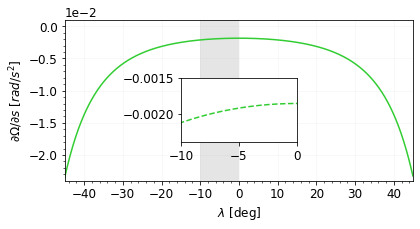

In [31]:
fig, ax = plt.subplots(figsize=(6,85*inch_to_mm))
s=5

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.plot(np.rad2deg(lats_rad),dwceds,color='limegreen')
# ax.set_yscale('log')
ax.grid(alpha=.1)
ax.set_xlim(-45,45)
ax.set_ylim((-2.4*10**(-2), 0.1*10**(-2)))
ax.set_xlabel(r'$\lambda$ [deg]')
ax.set_ylabel('$\partial\Omega / \partial s$ [$rad/s^2$]') 
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
# ax.legend(frameon=False)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())

scale=10
# axins = zoomed_inset_axes(ax, 1, loc=1)
axins = ax.inset_axes([-15, -18*10**(-3), 30, 0.01],transform=ax.transData)
axins.plot(np.rad2deg(lats_rad),dwceds,color='limegreen',linestyle='dashed')

axins.set_xlim(-10, 0)
axins.set_ylim(-2.4*10**(-3), -0.0015)
# plt.xticks(visible=False)
# plt.yticks(visible=False)
plt.axvspan(-10, 0, facecolor='gray', alpha=0.2)
# ax.legend(frameon=False)
plt.tight_layout()
plt.savefig('env_dwcds.jpg',dpi=300)
plt.show()

/home/tourgaidis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/home/tourgaidis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:99: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/home/tourgaidis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:135: UserWarning: AutoMinorLocator does not work with logarithmic scale
/home/tourgaidis/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


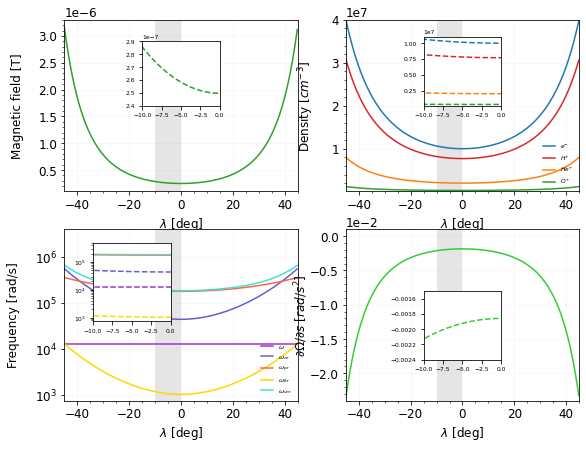

In [46]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})
###################################################################
fig, ax = plt.subplots(2,2,figsize=(8,6))
# fig.suptitle('Environment_mod parameters')
plt.tight_layout()
############
ax[0,0].plot(np.rad2deg(lats_rad),Bmag,color='tab:green')
# ax.set_yscale('log')
ax[0,0].grid(alpha=.1)
ax[0,0].set_xlim(-45,45)
ax[0,0].set_xlabel(r'$\lambda$ [deg]')
ax[0,0].set_ylabel('Magnetic field [T]',labelpad=15)
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
# ax.legend(frameon=False)
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,0].yaxis.set_minor_locator(tck.AutoMinorLocator())
ax[0,0].xaxis.set_minor_locator(tck.AutoMinorLocator())

scale=10
# axins = zoomed_inset_axes(ax, 1, loc=1)
axins1 = ax[0,0].inset_axes([-15, 1.7*10**(-6), 30, 1.2*10**(-6)],transform=ax[0,0].transData)
axins1.plot(np.rad2deg(lats_rad),Bmag,color='tab:green',linestyle='dashed')
axins1.tick_params(axis='both', which='major', labelsize=6)
axins1.set_xlim(-10, 0)
axins1.set_ylim(2.4*10**(-7), 2.9*10**(-7))
# plt.xticks(visible=False)
axins1.yaxis.get_offset_text().set_fontsize(6)
# plt.yticks(visible=False)
# mark_inset(ax[0,0], axins1, loc1=3, loc2=4, fc="gray",alpha=.3, ec="0.1")
ax[0,0].axvspan(-10, 0, facecolor='gray', alpha=0.2)

# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,1].plot(np.rad2deg(lats_rad),ne,color='tab:blue',label='$e^{-}$')
ax[0,1].plot(np.rad2deg(lats_rad),nH,color='tab:red',label='$H^{+}$')
ax[0,1].plot(np.rad2deg(lats_rad),nHe,color='tab:orange',label='$He^{+}$')
ax[0,1].plot(np.rad2deg(lats_rad),nO,color='tab:green',label='$O^{+}$')

# ax.set_yscale('log')
ax[0,1].grid(alpha=.1)
ax[0,1].set_xlim(-45,45)
ax[0,1].set_ylim(0.01*10**(7), 4*10**(7))
ax[0,1].set_xlabel(r'$\lambda$ [deg]')
ax[0,1].set_ylabel('Density $[cm^{-3}]$',labelpad=15)
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
# ax.legend(frameon=False)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,1].yaxis.set_minor_locator(tck.AutoMinorLocator())
ax[0,1].xaxis.set_minor_locator(tck.AutoMinorLocator())
ax[0,1].legend(frameon=False,loc=4, prop={'size': 6})
scale=10
# axins = zoomed_inset_axes(ax, 1, loc=1)
axins2 = ax[0,1].inset_axes([-15, 2*10**7, 30, 1.6*10**7],transform=ax[0,1].transData)

axins2.plot(np.rad2deg(lats_rad),ne,color='tab:blue',linestyle='dashed')
axins2.plot(np.rad2deg(lats_rad),nH,color='tab:red',linestyle='dashed')
axins2.plot(np.rad2deg(lats_rad),nHe,color='tab:orange',linestyle='dashed')
axins2.plot(np.rad2deg(lats_rad),nO,color='tab:green',linestyle='dashed')
axins2.tick_params(axis='both', which='major', labelsize=6)
axins2.set_xlim(-10, 0)
axins2.set_ylim(0.01*10**(7), 1.1*10**(7))
axins2.yaxis.get_offset_text().set_fontsize(6)
# plt.xticks(visible=False)
# plt.yticks(visible=False)
ax[0,1].axvspan(-10, 0, facecolor='gray', alpha=0.2)
# ###################


ax[1,0].plot(np.rad2deg(lats_rad),w_wave_array,color='darkorchid',label='$\omega$')
ax[1,0].plot(np.rad2deg(lats_rad),wce,color='slateblue',label='$\omega_{ce}$')
ax[1,0].plot(np.rad2deg(lats_rad),wpe,color='tomato',label='$\omega_{pe}$')
ax[1,0].plot(np.rad2deg(lats_rad),wlhr,color='gold',label='$\omega_{lhr}$')
ax[1,0].plot(np.rad2deg(lats_rad),wuhr,color='turquoise',label='$\omega_{uhr}$')

ax[1,0].set_yscale('log')
ax[1,0].grid(alpha=.1)
ax[1,0].set_xlim(-45,45)
ax[1,0].set_ylim(0, 4*10**(6))
ax[1,0].set_xlabel(r'$\lambda$ [deg]')
ax[1,0].set_ylabel('Frequency [rad/s]',labelpad=15) 
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
ax[1,0].legend(frameon=False,loc=4, prop={'size': 6})
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,0].yaxis.set_minor_locator(tck.AutoMinorLocator())
ax[1,0].xaxis.set_minor_locator(tck.AutoMinorLocator())
# ax.legend(frameon=False,loc=4)
scale=10
# axins = zoomed_inset_axes(ax, 1, loc=1)
axins3 = ax[1,0].inset_axes([-34, 4*10**4, 30, 20*10**5],transform=ax[1,0].transData)
axins3.yaxis.get_offset_text().set_fontsize(6)
axins3.set_yscale('log')
axins3.plot(np.rad2deg(lats_rad),w_wave_array,color='darkorchid',linestyle='dashed')
axins3.plot(np.rad2deg(lats_rad),wce,color='slateblue',linestyle='dashed')
axins3.plot(np.rad2deg(lats_rad),wpe,color='tomato')
axins3.plot(np.rad2deg(lats_rad),wlhr,color='gold',linestyle='dashed')
axins3.plot(np.rad2deg(lats_rad),wuhr,color='turquoise',linestyle='dashed')
axins3.tick_params(axis='both', which='major', labelsize=6)
axins3.set_xlim(-10, 0)
axins3.set_ylim(0, 5*10**(5))
# plt.xticks(visible=False)
# plt.yticks(visible=False)
ax[1,0].axvspan(-10, 0, facecolor='gray', alpha=0.2)



# ##########################################
ax[1,1].plot(np.rad2deg(lats_rad),dwceds,color='limegreen')
# ax.set_yscale('log')
ax[1,1].grid(alpha=.1)
ax[1,1].set_xlim(-45,45)
ax[1,1].set_ylim((-2.4*10**(-2), 0.1*10**(-2)))
ax[1,1].set_xlabel(r'$\lambda$ [deg]')
ax[1,1].set_ylabel('$\partial\Omega / \partial s$ [$rad/s^2$]',labelpad=0.01)
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
# ax.legend(frameon=False)
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax[1,1].yaxis.set_minor_locator(tck.AutoMinorLocator())
ax[1,1].xaxis.set_minor_locator(tck.AutoMinorLocator())

scale=10
# axins = zoomed_inset_axes(ax, 1, loc=1)
axins4 = ax[1,1].inset_axes([-15, -18*10**(-3), 30, 0.01],transform=ax[1,1].transData)
axins4.plot(np.rad2deg(lats_rad),dwceds,color='limegreen',linestyle='dashed')
axins4.yaxis.get_offset_text().set_fontsize(6)
axins4.set_xlim(-10, 0)
axins4.set_ylim(-2.4*10**(-3), -0.0015)
axins4.tick_params(axis='both', which='major', labelsize=6)
# plt.yticks(visible=False)
ax[1,1].axvspan(-10, 0, facecolor='gray', alpha=0.2)

# for ax in ax.flat:
#     ax.label_outer()
    
plt.savefig('env_multi.jpg',dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
lat=np.deg2rad(0)
L_shell=5
Bmag2=env.Bmag_dipole(L_shell,lat)
Kpmax=1
day=0
mlt=2
Rsun=90

theta=np.deg2rad(88)

ne_eq=env.density_FL_denton(ne_0,lat)
# print(ne_eq/10**7)

#assuming 84%H+, 5.4%He+, 0.6%O+
nH_eq=0.77*ne_eq
nHe_eq=0.2*ne_eq
nO_eq=0.03*ne_eq

wce_=env.omega_cyclotron(Bmag2,env.const.qe,env.const.me)
wcH=env.omega_cyclotron(Bmag2,env.const.qi,env.const.mH)
wcHe=env.omega_cyclotron(Bmag2,env.const.qi,env.const.mHe)
wcO=env.omega_cyclotron(Bmag2,env.const.qi,env.const.mO)

wpe=env.omega_plasma(ne_eq,env.const.qe,env.const.me)
wpH=env.omega_plasma(nH_eq,env.const.qi,env.const.mH)
wpHe=env.omega_plasma(nHe_eq,env.const.qe,env.const.mHe)
wpO=env.omega_plasma(nO_eq,env.const.qi,env.const.mO)

wlhr=env.omega_lhr(wce_,wpe,wcH,wpH)

f_wave=2000
w_wave=2*np.pi*f_wave

S_tmp,D_tmp,P_tmp,R_tmp,L_tmp=wave.stix_parameters(w_wave, ne_eq, nH_eq, nHe_eq, nO_eq, Bmag2)


mu_sq_plus_tmp,mu_sq_minus_tmp,ref_indtmp,kappatmp,kappa_partmp,kappa_pertmp=wave.refr_index_full(theta,w_wave,S_tmp,P_tmp,R_tmp,L_tmp)

K_11,K_12,K_13,K_21,K_22,K_23,K_31,K_32,K_33=wave.cold_dielectric_tensor(w_wave,wce_,wpe,wcH,wpH,wcHe,wpHe,wcO,wpO)


Ke,KH,KHe,KO=wave.warm_dielectric_tensor(w_wave,wce_,wpe,wcH,wpH,wcHe,wpHe,wcO,wpO,theta)

Te=1
Ti=1
ref_ind_warm,kappa_warm,kappa_par_warm,kappa_per_warm=wave.refr_index_warm(Ke,KH,KHe,KO,theta,Te,Ti,K_11,K_22,K_33,K_12,w_wave)
S_warm,D_warm,P_warm,R_warm,L_warm=wave.stix_parameters_warm(S_tmp,D_tmp,P_tmp,Te,Ti,ref_ind_warm,Ke,KH,KHe,KO)


theta_res=wave.res_angle(P_tmp,S_tmp)-0.00001

mu_sq_plus_res,mu_sq_minus_res,ref_indres,kappares,kappa_parres,kappa_perres=wave.refr_index_full(theta_res,w_wave,S_tmp,P_tmp,R_tmp,L_tmp)


#refractive index surface
thetas=np.arange(0,360,0.1)
thetas_rad=np.deg2rad(thetas)

mupar_cold=[]
muper_cold=[]
mupar_warm_e1_i0=[]
muper_warm_e1_i0=[]
mupar_warm_e0_i1=[]
muper_warm_e0_i1=[]
mupar_warm_e1_i1=[]
muper_warm_e1_i1=[]
mupar_warm_e4_i4=[]
muper_warm_e4_i4=[]
for i in range(0,len(thetas_rad)):
    
    mu_sq_plus_tmp,mu_sq_minus_tmp,ref_cold,kappatmp,kappa_partmp,kappa_pertmp=wave.refr_index_full(thetas_rad[i],w_wave,S_tmp,P_tmp,R_tmp,L_tmp)
    Ke,KH,KHe,KO=wave.warm_dielectric_tensor(w_wave,wce_,wpe,wcH,wpH,wcHe,wpHe,wcO,wpO,thetas_rad[i])
    ref_ind_warm10,kappa_warm,kappa_par_warm,kappa_per_warm=wave.refr_index_warm(Ke,KH,KHe,KO,thetas_rad[i],1,0,K_11,K_22,K_33,K_12,w_wave)
    ref_ind_warm01,kappa_warm,kappa_par_warm,kappa_per_warm=wave.refr_index_warm(Ke,KH,KHe,KO,thetas_rad[i],0,1,K_11,K_22,K_33,K_12,w_wave)
    ref_ind_warm11,kappa_warm,kappa_par_warm,kappa_per_warm=wave.refr_index_warm(Ke,KH,KHe,KO,thetas_rad[i],1,1,K_11,K_22,K_33,K_12,w_wave)
    ref_ind_warm44,kappa_warm,kappa_par_warm,kappa_per_warm=wave.refr_index_warm(Ke,KH,KHe,KO,thetas_rad[i],4,4,K_11,K_22,K_33,K_12,w_wave)
    
    
    ref_par_cold_tmp=ref_cold*np.cos(thetas_rad[i])
    ref_per_cold_tmp=ref_cold*np.sin(thetas_rad[i])
    ref_par_warm_tmp10=ref_ind_warm10*np.cos(thetas_rad[i])
    ref_per_warm_tmp10=ref_ind_warm10*np.sin(thetas_rad[i])
    ref_par_warm_tmp01=ref_ind_warm01*np.cos(thetas_rad[i])
    ref_per_warm_tmp01=ref_ind_warm01*np.sin(thetas_rad[i])
    ref_par_warm_tmp11=ref_ind_warm11*np.cos(thetas_rad[i])
    ref_per_warm_tmp11=ref_ind_warm11*np.sin(thetas_rad[i])
    ref_par_warm_tmp44=ref_ind_warm44*np.cos(thetas_rad[i])
    ref_per_warm_tmp44=ref_ind_warm44*np.sin(thetas_rad[i])
    
    mupar_cold.append(ref_par_cold_tmp)
    muper_cold.append(ref_per_cold_tmp)
    mupar_warm_e1_i0.append(ref_par_warm_tmp10)
    muper_warm_e1_i0.append(ref_per_warm_tmp10)
    mupar_warm_e0_i1.append(ref_par_warm_tmp01)
    muper_warm_e0_i1.append(ref_per_warm_tmp01)
    mupar_warm_e1_i1.append(ref_par_warm_tmp11)
    muper_warm_e1_i1.append(ref_per_warm_tmp11)
    mupar_warm_e4_i4.append(ref_par_warm_tmp44)
    muper_warm_e4_i4.append(ref_per_warm_tmp44)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


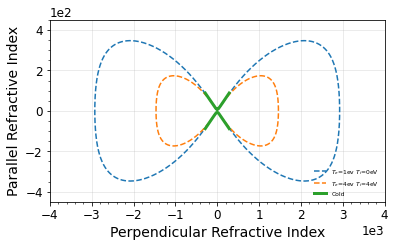

In [10]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
###########################################################
fig, ax = plt.subplots(figsize=(6,85*inch_to_mm))
s=5
# ax.set_title('Refractive index surface, f=2kHz, L=5,')
ax.set_xlabel("Perpendicular Refractive Index",fontsize=14)
ax.set_ylabel("Parallel Refractive Index",fontsize=14)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.plot(muper_warm_e1_i0,mupar_warm_e1_i0,label=r'$T_e$=1ev $T_i$=0eV',linestyle='--')
# ax.plot(muper_warm_e0_i1,mupar_warm_e0_i1,label=r'$T_e$=0ev $T_i$=1eV',linestyle='--')
# ax.plot(muper_warm_e1_i1,mupar_warm_e1_i1,label=r'$T_e$=1ev $T_i$=1eV',linestyle='--')
ax.plot(muper_warm_e4_i4,mupar_warm_e4_i4,label=r'$T_e$=4ev $T_i$=4eV',linestyle='--')
ax.plot(muper_cold,mupar_cold,color="tab:green",label='Cold',linewidth=3)

ax.legend(frameon=False,loc=4, prop={'size': 6})
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.set_xlim(-4000,4000)
ax.set_ylim(-450,450)
ax.grid(alpha=.3)
scale=10

plt.savefig('wave_refr.jpg',dpi=300, bbox_inches="tight")
plt.show()

In [72]:

S=[]
D=[]
P=[]
R=[]
L=[]

mu=[]
Ewmag=[]
Bwmag=[]
Bx=[]
By=[]
Bz=[]
Ex=[]
Ey=[]
Ez=[]
theta_res0=[]
Byw0_packet2=100*10**(-12)
shape=7
direction='south'
location=0


    
for i in range(0,len(Bmag)):
    S0,D0,P0,R0,L0=wave.stix_parameters(w_wave, ne[i], nH[i], nHe[i], nO[i], Bmag[i])
    eta_sq_plus0,eta_sq_minus0,mu0,kappa0,kappaz0,kappax0=wave.refr_index_full(theta0,w_wave,S0,P0,R0,L0)
    Bytmp=wave.wave_packet_one_sided(Byw0_packet2,lats_rad[i],shape,location,direction)
    Bxw0, Byw0, Bzw0, Exw0, Eyw0, Ezw0=wave.wave_amplitudes_bell(mu0,P0,D0,S0,Bytmp,theta0)
    
    theta_res0.append(np.rad2deg(wave.res_angle(P0,S0)))
    
    Bwmag.append(np.sqrt(Bxw0*Bxw0+Bzw0*Bzw0+Byw0*Byw0))
    Ewmag.append(np.sqrt(Exw0*Exw0+Ezw0*Ezw0+Eyw0*Eyw0))
    S.append(S0)
    D.append(D0)
    P.append(np.abs(P0))
    R.append(R0)
    L.append(np.abs(L0))
    
    Bx.append(Bxw0)
    By.append(Byw0)
    Bz.append(Bzw0)
    Ex.append(Exw0)
    Ey.append(Eyw0)
    Ez.append(Ezw0)

    mu.append(mu0)

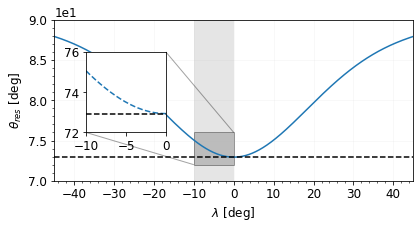

72.93846657358998


In [118]:
fig, ax = plt.subplots(figsize=(6,85*inch_to_mm))
s=5

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.plot(np.rad2deg(lats_rad),theta_res0,color='tab:blue',label='$S$')


# ax.set_yscale('log')
ax.grid(alpha=.1)
ax.set_xlim(-45,45)
ax.set_ylim(70, 90)
ax.set_xlabel(r'$\lambda$ [deg]')
ax.set_ylabel(r'$\theta_{res}$ [deg]') 
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
# ax.legend(frameon=False)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
# ax.legend(frameon=False,loc=4)
scale=10
axins = ax.inset_axes([-37, 76, 20,10],transform=ax.transData)

axins.plot(np.rad2deg(lats_rad),theta_res0,color='tab:blue',linestyle='dashed')

axins.set_xlim(-10, 0)
axins.set_ylim(72,76)
# plt.xticks(visible=False)
# plt.yticks(visible=False)
ax.axhline(np.min(theta_res0),color='black',linestyle='dashed')
axins.axhline(np.min(theta_res0),color='black',linestyle='dashed')
ax.axvspan(-10, 0, facecolor='gray', alpha=0.2)
mark_inset(ax, axins, loc1=3, loc2=1, fc="gray",alpha=.4, ec="0.1")
# ax.legend(frameon=False)
plt.tight_layout()
plt.savefig('theta_res.jpg',dpi=300)
plt.show()
print(np.min(theta_res0))

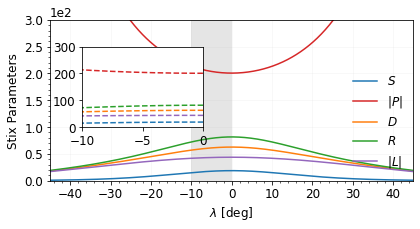

In [12]:
fig, ax = plt.subplots(figsize=(6,85*inch_to_mm))
s=5

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.plot(np.rad2deg(lats_rad),S,color='tab:blue',label='$S$')
ax.plot(np.rad2deg(lats_rad),P,color='tab:red',label='$|P|$')
ax.plot(np.rad2deg(lats_rad),D,color='tab:orange',label='$D$')
ax.plot(np.rad2deg(lats_rad),R,color='tab:green',label='$R$')
ax.plot(np.rad2deg(lats_rad),L,color='tab:purple',label='$|L|$')

# ax.set_yscale('log')
ax.grid(alpha=.1)
ax.set_xlim(-45,45)
ax.set_ylim(0, 300)
ax.set_xlabel(r'$\lambda$ [deg]')
ax.set_ylabel('Stix Parameters') 
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
# ax.legend(frameon=False)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax.legend(frameon=False,loc=4)
scale=10
axins = ax.inset_axes([-37, 100, 30, 150],transform=ax.transData)

axins.plot(np.rad2deg(lats_rad),S,color='tab:blue',label='$S$',linestyle='dashed')
axins.plot(np.rad2deg(lats_rad),P,color='tab:red',label='$|P|$',linestyle='dashed')
axins.plot(np.rad2deg(lats_rad),D,color='tab:orange',label='$D$',linestyle='dashed')
axins.plot(np.rad2deg(lats_rad),R,color='tab:green',label='$R$',linestyle='dashed')
axins.plot(np.rad2deg(lats_rad),L,color='tab:purple',label='$|L|$',linestyle='dashed')

axins.set_xlim(-10, 0)
axins.set_ylim(0,300)
# plt.xticks(visible=False)
# plt.yticks(visible=False)
ax.axvspan(-10, 0, facecolor='gray', alpha=0.2)

# ax.legend(frameon=False)
plt.tight_layout()
plt.savefig('wave_stix.jpg',dpi=300)
plt.show()

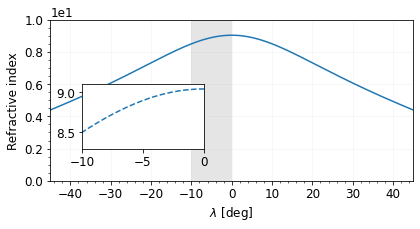

In [97]:
fig, ax = plt.subplots(figsize=(6,85*inch_to_mm))
s=5

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.plot(np.rad2deg(lats_rad),mu,color='tab:blue',label='$\mu$')

# ax.set_yscale('log')
ax.grid(alpha=.1)
ax.set_xlim(-45,45)
ax.set_ylim(0, 10)
ax.set_xlabel(r'$\lambda$ [deg]')
ax.set_ylabel('Refractive index') 
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
# ax.legend(frameon=False)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())

scale=10
axins = ax.inset_axes([-37, 2, 30, 4],transform=ax.transData)

axins.plot(np.rad2deg(lats_rad),mu,color='tab:blue',label='$S$',linestyle='dashed')
axins.set_xlim(-10, 0)
axins.set_ylim(8.3,9.1)
# plt.xticks(visible=False)
# plt.yticks(visible=False)
ax.axvspan(-10, 0, facecolor='gray', alpha=0.2)

# ax.legend(frameon=False)
plt.tight_layout()
plt.savefig('wave_refr_index.jpg',dpi=300)
plt.show()

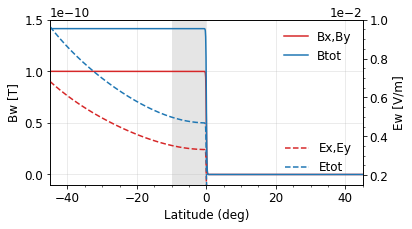

In [14]:
fig, ax1 = plt.subplots(figsize=(6,85*inch_to_mm))

ax1.set_xlabel('Latitude (deg)')
ax1.set_ylabel('Bw [T]')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax1.set_ylim(-0.1*10**(-10),1.5*10**(-10))
ax1.plot(np.rad2deg(lats_rad),Bx,label='Bx,By',color='tab:red')
ax1.plot(np.rad2deg(lats_rad),Bwmag,label='Btot',color='tab:blue')

ax1.legend(frameon=False)
ax1.tick_params(axis='y')

ax1.axvspan(-10, 0, facecolor='gray', alpha=0.2)
ax1.set_xlim(-45,45)
ax1.grid(alpha=.3)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Ew [V/m]')  # we already handled the x-label with ax1
ax2.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax2.plot(np.rad2deg(lats_rad),Ex,label='Ex,Ey',color='tab:red',linestyle='dashed')
ax2.plot(np.rad2deg(lats_rad),Ewmag,label='Etot',color='tab:blue',linestyle='dashed')
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.tick_params(axis='y')
ax2.set_ylim(1.5*10**(-3),10*10**(-3))
ax2.legend(frameon=False,loc=4)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.savefig('fields_%d_By_%d_nT.jpg' %(aeq0_deg,By_wave/10**(-12)),dpi=300)
plt.show()

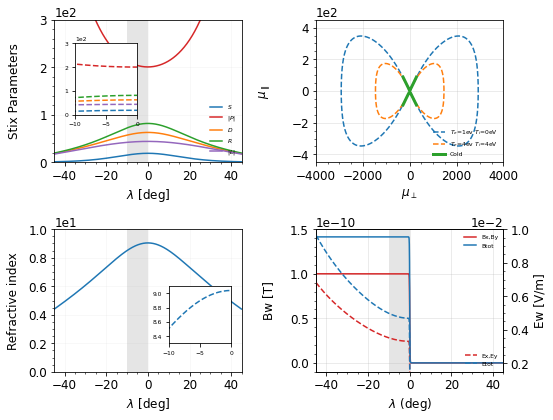

In [56]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})
###################################################################
fig, ax = plt.subplots(2,2,figsize=(8,6))
# fig.suptitle('Environment_mod parameters')
plt.tight_layout()
############

ax[0,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,0].plot(np.rad2deg(lats_rad),S,color='tab:blue',label='$S$')
ax[0,0].plot(np.rad2deg(lats_rad),P,color='tab:red',label='$|P|$')
ax[0,0].plot(np.rad2deg(lats_rad),D,color='tab:orange',label='$D$')
ax[0,0].plot(np.rad2deg(lats_rad),R,color='tab:green',label='$R$')
ax[0,0].plot(np.rad2deg(lats_rad),L,color='tab:purple',label='$|L|$')

# ax.set_yscale('log')
ax[0,0].grid(alpha=.1)
ax[0,0].set_xlim(-45,45)
ax[0,0].set_ylim(0, 300)
ax[0,0].set_xlabel(r'$\lambda$ [deg]')
ax[0,0].set_ylabel('Stix Parameters',labelpad=19) 
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
# ax.legend(frameon=False)
ax[0,0].yaxis.set_minor_locator(tck.AutoMinorLocator())
ax[0,0].xaxis.set_minor_locator(tck.AutoMinorLocator())
ax[0,0].legend(frameon=False,loc=4, prop={'size': 6})
scale=10

axins1 = ax[0,0].inset_axes([-35, 100, 30, 150],transform=ax[0,0].transData)
axins1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axins1.yaxis.get_offset_text().set_fontsize(6)
axins1.tick_params(axis='both', which='major', labelsize=6)
axins1.plot(np.rad2deg(lats_rad),S,color='tab:blue',label='$S$',linestyle='dashed')
axins1.plot(np.rad2deg(lats_rad),P,color='tab:red',label='$|P|$',linestyle='dashed')
axins1.plot(np.rad2deg(lats_rad),D,color='tab:orange',label='$D$',linestyle='dashed')
axins1.plot(np.rad2deg(lats_rad),R,color='tab:green',label='$R$',linestyle='dashed')
axins1.plot(np.rad2deg(lats_rad),L,color='tab:purple',label='$|L|$',linestyle='dashed')

axins1.set_xlim(-10, 0)
axins1.set_ylim(0,300)
# plt.xticks(visible=False)
# plt.yticks(visible=False)
ax[0,0].axvspan(-10, 0, facecolor='gray', alpha=0.2)

##############################
ax[0,1].set_xlabel("$\mu_\perp$",fontsize=12)
ax[0,1].set_ylabel("$\mu_\parallel$",fontsize=12,labelpad=19) 
ax[0,1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,1].plot(muper_warm_e1_i0,mupar_warm_e1_i0,label=r'$T_e$=1ev $T_i$=0eV',linestyle='--')
# ax.plot(muper_warm_e0_i1,mupar_warm_e0_i1,label=r'$T_e$=0ev $T_i$=1eV',linestyle='--')
# ax.plot(muper_warm_e1_i1,mupar_warm_e1_i1,label=r'$T_e$=1ev $T_i$=1eV',linestyle='--')
ax[0,1].plot(muper_warm_e4_i4,mupar_warm_e4_i4,label=r'$T_e$=4ev $T_i$=4eV',linestyle='--')
ax[0,1].plot(muper_cold,mupar_cold,color="tab:green",label='Cold',linewidth=3)

ax[0,1].legend(frameon=False,loc=4, prop={'size': 6})
ax[0,1].yaxis.get_ticklocs(minor=True)
ax[0,1].minorticks_on()
ax[0,1].set_xlim(-4000,4000)
ax[0,1].set_ylim(-450,450)
ax[0,1].grid(alpha=.3)
#####################

ax[1,0].plot(np.rad2deg(lats_rad),mu,color='tab:blue',label='$\mu$')

# ax.set_yscale('log')
ax[1,0].grid(alpha=.1)
ax[1,0].set_xlim(-45,45)
ax[1,0].set_ylim(0, 10)
ax[1,0].set_xlabel(r'$\lambda$ [deg]')
ax[1,0].set_ylabel('Refractive index',labelpad=8)
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
# ax.legend(frameon=False)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,0].yaxis.set_minor_locator(tck.AutoMinorLocator())
ax[1,0].xaxis.set_minor_locator(tck.AutoMinorLocator())
ax[1,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
scale=10
axins3 = ax[1,0].inset_axes([10, 2, 30, 4],transform=ax[1,0].transData)
axins3.tick_params(axis='both', which='major', labelsize=6)
axins3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axins3.plot(np.rad2deg(lats_rad),mu,color='tab:blue',label='$S$',linestyle='dashed')
axins3.set_xlim(-10, 0)
axins3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axins3.set_ylim(8.3,9.1)
# plt.xticks(visible=False)
# plt.yticks(visible=False)
ax[1,0].axvspan(-10, 0, facecolor='gray', alpha=0.2)

#############################################

ax[1,1].set_xlabel('$\lambda$ (deg)')
ax[1,1].set_ylabel('Bw [T]',labelpad=15)
ax[1,1].xaxis.set_minor_locator(tck.AutoMinorLocator())
ax[1,1].set_ylim(-0.1*10**(-10),1.5*10**(-10))
ax[1,1].plot(np.rad2deg(lats_rad),Bx,label='Bx,By',color='tab:red')
ax[1,1].plot(np.rad2deg(lats_rad),Bwmag,label='Btot',color='tab:blue')
ax[1,1].yaxis.set_minor_locator(tck.AutoMinorLocator())
ax[1,1].legend(frameon=False, prop={'size': 6})
ax[1,1].tick_params(axis='y')

ax[1,1].axvspan(-10, 0, facecolor='gray', alpha=0.2)
ax[1,1].set_xlim(-45,45)
ax[1,1].grid(alpha=.3)
ax2 = ax[1,1].twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Ew [V/m]')  # we already handled the x-label with ax1
ax2.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax2.plot(np.rad2deg(lats_rad),Ex,label='Ex,Ey',color='tab:red',linestyle='dashed')
ax2.plot(np.rad2deg(lats_rad),Ewmag,label='Etot',color='tab:blue',linestyle='dashed')
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.tick_params(axis='y')
ax2.set_ylim(1.5*10**(-3),10*10**(-3))
ax2.legend(frameon=False,loc=4, prop={'size': 6})
fig.tight_layout()  # otherwise the right y-label is slightly clipped

# for ax in ax.flat:
#     ax.label_outer()
    
plt.savefig('wave_multi.jpg',dpi=300)
plt.show()

In [62]:
L_shell=5
lamdas=np.arange(-90,90,0.08)
lamdas_rad=np.deg2rad(lamdas)
aeqs=np.arange(0,180,0.08)
aeqs_rad=np.deg2rad(aeqs)
Beq0=env.Bmag_dipole(5,0)
alphas=np.zeros((len(lamdas_rad),len(aeqs)))

envelope=[]
envelope2=[]
for k in range(0,len(aeqs_rad)):
        
    for i in range(0,len(lamdas_rad)):
    
        Blam0=env.Bmag_dipole(5,lamdas_rad[i])
        salpha0=np.sin(aeqs_rad[k])*np.sqrt(Blam0/Beq0)
        alpha0=np.arcsin(salpha0)
        alphas[i,k]=alpha0

        if np.isnan(alpha0) != True:
        
            print(np.rad2deg(alpha0),np.rad2deg(aeqs_rad[k]),np.rad2deg(lamdas_rad[i]))
            envelope.append(np.rad2deg(lamdas_rad[i]))
            break
            
# envelope2=-envelope
#         print(np.rad2deg(aeqs_rad[k]),np.rad2deg(lamdas_rad[i]),np.rad2deg(alpha0))

for i in range(0,len(envelope)):
        envelope2.append(-envelope[i])
        
#             print(np.rad2deg(aeqs_rad[k]))
#             continue

0.0 0.0 -90.0
89.77810688071897 0.08 -82.80000000000015
80.766775091774 0.16 -80.8800000000002
78.01674109973926 0.24 -79.52000000000022
79.77219087650879 0.32 -78.48000000000025
81.25102449851309 0.4 -77.60000000000026
80.10356403336141 0.48 -76.80000000000028
87.15775727775095 0.56 -76.1600000000003
86.7707902366143 0.64 -75.52000000000031
81.23353797447938 0.72 -74.88000000000034
80.48587069156198 0.8 -74.32000000000033
82.97066757754634 0.88 -73.84000000000034
83.30336768442963 0.96 -73.36000000000035
81.68236484980191 1.04 -72.88000000000036
84.6072095267233 1.12 -72.48000000000037
86.54594941652323 1.2 -72.0800000000004
86.26235843968281 1.28 -71.68000000000039
84.33652808684117 1.36 -71.2800000000004
82.0231034891508 1.44 -70.88000000000041
84.70359158452938 1.52 -70.56000000000041
87.74318117481901 1.6 -70.24000000000042
81.6763199788914 1.6800000000000002 -69.84000000000043
81.8779971929423 1.76 -69.52000000000044
81.56002323595985 1.84 -69.20000000000044
86.56531879251597 1.9

/home/tourgaidis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in arcsin


 4.72 -61.20000000000062
83.33778674435776 4.8 -61.04000000000062
83.77477977025988 4.88 -60.88000000000063
84.14723404157063 4.96 -60.720000000000624
84.44650636497921 5.04 -60.560000000000635
84.66460442957823 5.12 -60.40000000000063
84.7955642852754 5.2 -60.24000000000063
84.83684870456621 5.28 -60.08000000000064
84.79020912450125 5.36 -59.920000000000634
84.66157554958775 5.44 -59.760000000000645
84.46000112562326 5.520000000000001 -59.60000000000064
84.19613866417113 5.6000000000000005 -59.44000000000065
83.88081995122992 5.68 -59.28000000000065
83.52407490673407 5.76 -59.12000000000066
83.134636231227 5.84 -58.96000000000066
87.60097680440896 5.92 -58.88000000000066
86.45409487199194 6.000000000000001 -58.720000000000674
85.52703187615128 6.08 -58.56000000000067
84.70560128016673 6.16 -58.40000000000068
83.94876055422404 6.240000000000001 -58.24000000000068
83.23661308451459 6.32 -58.08000000000069
86.89632190360443 6.4 -58.00000000000068
85.51942249022063 6.48 -57.84000000000069

86.98715746547428 20.64 -40.80000000000105
86.61205414177081 20.72 -40.72000000000105
86.26930605803017 20.8 -40.64000000000105
85.95076654977984 20.88 -40.560000000001054
85.65118422519845 20.96 -40.480000000001056
85.36694646134596 21.04 -40.40000000000106
85.09544650795158 21.12 -40.32000000000106
89.36735553531247 21.200000000000003 -40.32000000000106
88.23089047181438 21.28 -40.24000000000106
87.57226992020054 21.36 -40.16000000000106
87.05177413815044 21.44 -40.080000000001064
86.6053475789566 21.52 -40.000000000001066
86.20682221862016 21.6 -39.92000000000107
85.84246745596047 21.68 -39.84000000000107
85.5040292884574 21.76 -39.76000000000107
85.18609495350321 21.84 -39.68000000000107
89.38884912661635 21.92 -39.68000000000107
88.13911011263886 22.0 -39.600000000001074
87.43448178740658 22.080000000000005 -39.520000000001076
86.88072047731428 22.160000000000004 -39.44000000000108
86.40744348151615 22.240000000000002 -39.36000000000108
85.98614266385997 22.32 -39.28000000000108
8

86.44754622521216 37.12 -28.08000000000132
89.26994983383244 37.2 -28.08000000000132
87.44082283550757 37.28 -28.00000000000132
86.45761592935773 37.36 -27.920000000001323
89.24760188517635 37.44 -27.920000000001323
87.43295538907856 37.52 -27.840000000001325
86.45095820272189 37.6 -27.760000000001327
89.15330555401793 37.68000000000001 -27.760000000001327
87.40257006005984 37.76 -27.68000000000133
86.4281033189579 37.84 -27.60000000000133
89.00892312625022 37.92 -27.60000000000133
87.35102400687572 38.0 -27.520000000001332
86.3897837332449 38.08 -27.440000000001334
88.83420631880591 38.160000000000004 -27.440000000001334
87.28007770980311 38.24 -27.360000000001335
86.33689649517085 38.32 -27.280000000001337
88.64190830327404 38.4 -27.280000000001337
87.19173230067067 38.480000000000004 -27.20000000000134
86.27045903842286 38.56000000000001 -27.12000000000134
88.43945708780473 38.64 -27.12000000000134
87.08807483183487 38.72 -27.040000000001342
86.19156358159185 38.800000000000004 -26.

89.28304630564946 52.72 -18.64000000000152
87.55376681756157 52.800000000000004 -18.560000000001523
86.6202133032425 52.88 -18.480000000001525
87.87858673217082 52.96 -18.480000000001525
86.8484900424445 53.04 -18.400000000001526
88.25399708809954 53.120000000000005 -18.400000000001526
87.08921870020005 53.2 -18.320000000001528
88.72402980914714 53.28 -18.320000000001528
87.34585131981783 53.36 -18.24000000000153
89.51136382437599 53.44 -18.24000000000153
87.62360808867695 53.52 -18.16000000000153
86.67974114973427 53.6 -18.080000000001533
87.93106278505905 53.68 -18.080000000001533
86.89369549140696 53.760000000000005 -18.000000000001535
88.2842059812811 53.84 -18.000000000001535
87.11831483182074 53.92 -17.920000000001536
88.72045304377716 54.0 -17.920000000001536
87.35638061415398 54.08 -17.840000000001538
89.39997039450574 54.160000000000004 -17.840000000001538
87.61198165555645 54.24 -17.76000000000154
86.68138810443246 54.32 -17.68000000000154
87.89156506106299 54.4 -17.680000000

87.54849330852215 68.08 -10.480000000001695
88.47359277039449 68.16 -10.480000000001695
87.55871181043356 68.24 -10.400000000001697
88.48026586798456 68.32000000000001 -10.400000000001697
87.5676729876439 68.4 -10.320000000001698
88.48490102697204 68.48 -10.320000000001698
87.57540140725165 68.56 -10.2400000000017
88.48754105859753 68.64 -10.2400000000017
87.58192357699468 68.72 -10.160000000001702
88.48823663263704 68.8 -10.160000000001702
87.58726784287347 68.88000000000001 -10.080000000001704
88.48704568824473 68.96000000000001 -10.080000000001704
87.59146427425917 69.04 -10.000000000001705
88.48403272056622 69.12 -10.000000000001705
87.59454453815763 69.2 -9.920000000001709
88.47926797063761 69.28 -9.920000000001709
87.59654176447029 69.36 -9.840000000001709
88.47282654870719 69.44 -9.840000000001709
87.5974904041838 69.52 -9.76000000000171
88.46478752170484 69.60000000000001 -9.76000000000171
87.59742608243641 69.68 -9.680000000001712
88.4552329942858 69.76 -9.680000000001712
87.5

88.76638060696048 83.28 -3.120000000001852
89.33048159211901 83.36 -3.120000000001852
88.73560052443571 83.44 -3.0400000000018537
89.25764305718099 83.52 -3.0400000000018537
88.70757983086969 83.60000000000002 -2.9600000000018554
89.19459958746079 83.68 -2.9600000000018554
88.68216416677093 83.76 -2.880000000001857
89.1392292793822 83.84 -2.880000000001857
88.65922614368972 83.92000000000002 -2.8000000000018592
89.09016053963052 84.0 -2.8000000000018592
88.63866043531746 84.08 -2.7200000000018605
89.046448283627 84.16 -2.7200000000018605
88.62038008319271 84.24 -2.640000000001862
89.00741096795966 84.32000000000001 -2.640000000001862
89.71723547285524 84.4 -2.640000000001862
88.97254038055084 84.48 -2.560000000001864
89.58018489570559 84.56 -2.560000000001864
88.941448037556 84.64 -2.4800000000018656
89.48333995098572 84.72 -2.4800000000018656
88.91383154106747 84.80000000000001 -2.4000000000018673
89.40671519746756 84.88 -2.4000000000018673
88.88945253396818 84.96000000000001 -2.32000

88.54726500640922 97.92 -3.68000000000184
89.14841673303806 98.0 -3.7600000000018383
88.57875958434919 98.08000000000001 -3.7600000000018383
89.22288869149328 98.16 -3.8400000000018366
88.61264125842126 98.24000000000001 -3.8400000000018366
89.30861436174773 98.32000000000001 -3.9200000000018345
88.64906304499144 98.4 -3.9200000000018345
89.41042118338288 98.48 -4.000000000001834
88.68820859472912 98.56 -4.000000000001834
89.53875882930778 98.64 -4.0800000000018315
88.7303004159976 98.72 -4.0800000000018315
89.7288719575933 98.8 -4.16000000000183
88.77561127454575 98.88 -4.16000000000183
88.28604339010158 98.96000000000001 -4.16000000000183
88.82448040315846 99.04 -4.240000000001828
88.31280776686316 99.12 -4.240000000001828
88.87733725508602 99.2 -4.320000000001826
88.34125970553113 99.28 -4.320000000001826
88.93473759104256 99.36 -4.400000000001825
88.37146285799355 99.44 -4.400000000001825
88.99742076923873 99.52 -4.480000000001823
88.40349087736207 99.60000000000001 -4.480000000001

88.42595990979599 112.48 -10.800000000001688
87.49462714606415 112.56 -10.800000000001688
88.40875156001644 112.64 -10.880000000001687
87.47782673946728 112.72 -10.880000000001687
88.38942641503259 112.8 -10.960000000001685
87.45966618932191 112.88 -10.960000000001685
88.36799966903097 112.96000000000001 -11.040000000001683
87.44013607827843 113.04 -11.040000000001683
88.34449335146869 113.12000000000002 -11.120000000001681
87.41922917428666 113.2 -11.120000000001681
88.31893561704258 113.28 -11.20000000000168
87.39694038614651 113.36 -11.20000000000168
88.29135998357957 113.44 -11.28000000000168
87.37326670441024 113.52 -11.28000000000168
88.26180454496672 113.60000000000001 -11.360000000001678
87.34820712895208 113.68000000000002 -11.360000000001678
88.2303111838825 113.76 -11.440000000001675
87.32176258468783 113.84 -11.440000000001675
88.19692480570623 113.92 -11.520000000001673
87.29393582703793 114.00000000000001 -11.520000000001673
88.16169261106072 114.08 -11.600000000001671
87

87.62360808867695 126.47999999999999 -18.16000000000153
89.51136382437524 126.56000000000002 -18.24000000000153
87.34585131981783 126.64000000000001 -18.24000000000153
88.72402980914714 126.72 -18.320000000001528
87.08921870020005 126.8 -18.320000000001528
88.25399708809934 126.88000000000002 -18.400000000001526
86.84849004244438 126.96000000000002 -18.400000000001526
87.87858673217066 127.04 -18.480000000001525
86.6202133032425 127.12 -18.480000000001525
87.55376681756171 127.2 -18.560000000001523
89.28304630565098 127.28 -18.64000000000152
87.26141117295785 127.35999999999999 -18.64000000000152
88.57771849590524 127.44000000000001 -18.72000000000152
86.99197945029024 127.52000000000001 -18.72000000000152
88.11201806962713 127.60000000000001 -18.800000000001518
86.73972803943082 127.67999999999999 -18.800000000001518
87.73302906298659 127.76000000000002 -18.880000000001516
86.50088754000706 127.84000000000002 -18.880000000001516
87.40244482298677 127.92 -18.960000000001514
88.89540235

87.43295538907913 142.48 -27.840000000001325
89.24760188517538 142.56 -27.920000000001323
86.45761592935773 142.64000000000001 -27.920000000001323
87.44082283550757 142.72 -28.00000000000132
89.26994983383044 142.8 -28.08000000000132
86.44754622521246 142.88 -28.08000000000132
87.42535616743821 142.96 -28.160000000001318
89.21217946575977 143.04 -28.240000000001316
86.4204469340643 143.12 -28.240000000001316
87.3863587207991 143.20000000000002 -28.320000000001315
89.08765136895143 143.28 -28.400000000001313
86.37625464200745 143.36 -28.400000000001313
87.32425223564772 143.44 -28.48000000000131
88.91768818523552 143.52 -28.56000000000131
86.31513862820917 143.6 -28.56000000000131
87.23999775406595 143.68 -28.64000000000131
88.71896755890275 143.76 -28.720000000001306
86.23747941256157 143.84 -28.720000000001306
87.1349619154727 143.92000000000002 -28.800000000001308
88.50176741145414 144.0 -28.880000000001303
86.1438354203477 144.08 -28.880000000001303
87.01076234109345 144.16 -28.9600

89.36735553530902 158.8 -40.32000000000106
85.09544650795209 158.88 -40.32000000000106
85.3669464613458 158.96 -40.40000000000106
85.65118422519845 159.04 -40.480000000001056
85.95076654978001 159.12 -40.560000000001054
86.26930605802967 159.20000000000002 -40.64000000000105
86.61205414177039 159.28000000000003 -40.72000000000105
86.98715746547404 159.36 -40.80000000000105
87.40850558966342 159.44 -40.88000000000105
87.90364802425168 159.52 -40.960000000001045
88.5458960362864 159.6 -41.040000000001044
84.82494909609413 159.68 -41.040000000001044
85.03472972991862 159.76 -41.12000000000104
85.24925070242006 159.84 -41.20000000000105
85.46910963930705 159.92000000000002 -41.28000000000104
85.69504369027068 160.0 -41.360000000001044
85.92797763570593 160.08 -41.440000000001035
86.16909520596815 160.16000000000003 -41.52000000000103
86.4199488329748 160.24 -41.60000000000103
86.68263640966944 160.32 -41.68000000000103
86.9601026221387 160.4 -41.76000000000103
87.25669167015906 160.48 -41.

82.74072700316927 176.32 -63.60000000000056
84.99685873034053 176.4 -63.84000000000056
82.46968522464915 176.48 -64.00000000000055
84.27482467833572 176.56 -64.24000000000055
86.75031692865805 176.64000000000004 -64.48000000000054
82.9464570666818 176.72 -64.64000000000054
84.32979527681694 176.8 -64.88000000000054
85.90723018779877 176.88 -65.12000000000053
88.06609395257294 176.96 -65.36000000000053
82.57226417291582 177.04 -65.52000000000052
83.05175387924821 177.12 -65.76000000000052
83.33416863009738 177.20000000000002 -66.00000000000051
83.37471630051662 177.28000000000003 -66.2400000000005
83.14866316989219 177.36 -66.4800000000005
82.6599622764385 177.44 -66.7200000000005
81.93585130562003 177.52 -66.96000000000049
86.23806124605596 177.6 -67.28000000000048
84.14877722023854 177.68 -67.52000000000048
82.27052088308362 177.76 -67.76000000000047
85.30853566570778 177.84 -68.08000000000047
82.30049304490751 177.92000000000002 -68.32000000000046
84.290673789729 178.0 -68.6400000000

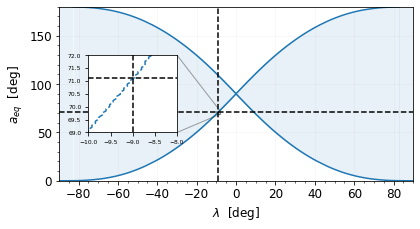

In [64]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})
inch_to_mm=0.0393700787
import matplotlib.ticker as tck
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
fig, ax = plt.subplots(figsize=(6,85*inch_to_mm))
s=5

# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.plot(envelope,np.rad2deg(aeqs_rad),color="tab:blue")
ax.plot(envelope2,np.rad2deg(aeqs_rad),color="tab:blue")
ax.axvline(-9,color='black',linestyle='dashed')
ax.axhline(71,color='black',linestyle='dashed')
# ax.set_yscale('log')
ax.grid(alpha=.1)
ax.set_xlim(-90,90)
ax.set_ylim(0,180)
ax.set_xlabel("$\lambda$  [deg]")
ax.set_ylabel("$a_{eq}$  [deg]")
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
# ax.legend(frameon=False)
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax.fill_between(envelope, np.rad2deg(aeqs_rad),color='tab:blue',alpha=0.1, linewidth=0.0)
ax.fill_between(envelope2, np.rad2deg(aeqs_rad),color='tab:blue',alpha=0.1, linewidth=0.0)
ax.axvspan(-90,-82.6,color='tab:blue',alpha=0.1, linewidth=0.0)
ax.axvspan(82.6,90,color='tab:blue',alpha=0.1, linewidth=0.0)
scale=10
# # axins = zoomed_inset_axes(ax, 1, loc=1)
axins = ax.inset_axes([-75, 50, 45, 80],transform=ax.transData)
axins.plot(envelope,np.rad2deg(aeqs_rad),color="tab:blue",linestyle='dashed')
# axins.plot(envelope2,np.rad2deg(aeqs_rad),color="tab:blue")
axins.axvline(-9,color='black',linestyle='dashed')
axins.axhline(71.1,color='black',linestyle='dashed')

axins.set_xlim(-10, -8)
axins.set_ylim(69, 72)
axins.tick_params(axis='both', which='major', labelsize=6)
# plt.xticks(visible=False)
# plt.yticks(visible=False)
mark_inset(ax, axins, loc1=4, loc2=1, fc="gray",alpha=.4, ec="0.1")
# plt.axvspan(-10, 0, facecolor='gray', alpha=0.2)
# ax.legend(frameon=False)
plt.tight_layout()
plt.savefig('env_magnetic.jpg',dpi=300)
plt.show()

In [64]:

Lshell=5
# Kp value in the preceding 24 hours
Kpmax1=1
Kpmax2=5
# day number (here January the first)
day=0
#magnetic local time (02.00)
mlt=2
#13 month average sunspot number
Rsun1=90
Rsun2=40

#initialize an empty array
ne_final_min=[]
ne_final_max=[]

lamdas=np.arange(-45,45,0.08)
lamdas_rad=np.deg2rad(lamdas)

ne_min=env.density_equ_carpenter_anderson(Lshell,Kpmax1,day,mlt,Rsun1)
ne_max=env.density_equ_carpenter_anderson(Lshell,Kpmax2,day,mlt,Rsun2)

ne_s_mean,ne_s_min,ne_s_max=env.density_equ_sheeley(Lshell)

ne_CAmin_denton=[]
neq_oz=[]
nelam_oz=[]
ne_CAmax_denton=[]
ne_s_denton=[]
ne_bortink=[]
for i in range(0,len(lamdas)):
    ne_CAmin_denton_tmp=env.density_FL_denton(ne_min,lamdas_rad[i])
    ne_bort_tmp=env.density_FL_denton(10,lamdas_rad[i])
    neq_oz_tmp,nelam_oz_tmp=env.density_ozhogin(Lshell,lamdas_rad[i])
    ne_CAmax_denton_tmp=env.density_FL_denton(ne_max,lamdas_rad[i])
#     print(neq_oz_tmp)
    ne_s_denton_tmp=env.density_FL_denton(ne_s_mean,lamdas_rad[i])
    
    ne_CAmin_denton.append(ne_CAmin_denton_tmp)
    neq_oz.append(neq_oz_tmp)
    nelam_oz.append(nelam_oz_tmp)
    ne_CAmax_denton.append(ne_CAmax_denton_tmp)
    ne_s_denton.append(ne_s_denton_tmp)
    ne_bortink.append(ne_bort_tmp)
    
print(ne_min)
print(ne_max)
print(ne_s_mean)
print(ne_s_min)
print(neq_oz[0])

216.30223886572563
4.8637109784408725
119.71285880287195
49.76133525826508
104.18375349865367


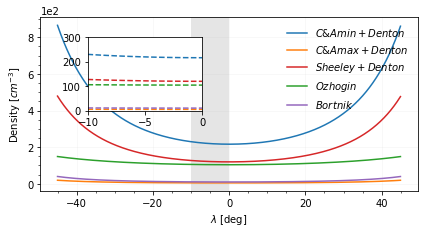

In [78]:
import matplotlib.ticker as tck
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

inch_to_mm=0.0393700787
fig, ax = plt.subplots(figsize=(6,85*inch_to_mm))
s=5

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.plot(np.rad2deg(lamdas_rad),ne_CAmin_denton,color='tab:blue',label='$C&A min + Denton$')
ax.plot(np.rad2deg(lamdas_rad),ne_CAmax_denton,color='tab:orange',label='$C&A max + Denton$')
ax.plot(np.rad2deg(lamdas_rad),ne_s_denton,color='tab:red',label='$Sheeley + Denton$')
ax.plot(np.rad2deg(lamdas_rad),nelam_oz,color='tab:green',label='$Ozhogin$')
ax.plot(np.rad2deg(lamdas_rad),ne_bortink,color='tab:purple',label='$Bortnik$')

# ax.set_yscale('log')
ax.grid(alpha=.1)
# ax.set_xlim(-45,45)
# ax.set_ylim(0, 10)
ax.set_xlabel(r'$\lambda$ [deg]')
ax.set_ylabel('Density $[cm^{-3}]$') 
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
ax.legend(frameon=False,loc=1)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())

axins = ax.inset_axes([-37, 400, 30, 400],transform=ax.transData)

axins.plot(np.rad2deg(lamdas_rad),ne_CAmin_denton,color='tab:blue',label='$C&A min + Denton$',linestyle='dashed')
axins.plot(np.rad2deg(lamdas_rad),ne_CAmax_denton,color='tab:orange',label='$C&A max + Denton$',linestyle='dashed')
axins.plot(np.rad2deg(lamdas_rad),ne_s_denton,color='tab:red',label='$Sheeley + Denton$',linestyle='dashed')
axins.plot(np.rad2deg(lamdas_rad),nelam_oz,color='tab:green',label='$Ozhogin$',linestyle='dashed')
axins.plot(np.rad2deg(lamdas_rad),ne_bortink,color='tab:purple',label='$Bortnik$',linestyle='dashed')

axins.set_xlim(-10, 0)
axins.set_ylim(0,300)
# plt.xticks(visible=False)
# plt.yticks(visible=False)
ax.axvspan(-10, 0, facecolor='gray', alpha=0.2)

# ax.legend(frameon=False)
plt.tight_layout()
plt.savefig('densities_wpi.jpg',dpi=300)
plt.show()